# Vedant Arora
# Bsc Mathematical Sciences
# University of Delhi

# Importing GDP per Capita data and cleaning it for efficient usage

In [ ]:
import pandas as pd
gdp_df = pd.read_csv("gdp_per_capita.csv",skiprows=4)
cols_to_drop = ['Indicator Name', 'Indicator Code', 'Unnamed: 69',"Country Code"]
gdp_df = gdp_df.drop(columns=[c for c in cols_to_drop if c in gdp_df.columns])
gdp = gdp_df.melt(id_vars=["Country Name"],var_name="Year",value_name="GDP per Capita")
gdf = gdp.loc[gdp["Country Name"]=="India"].copy()
gdf["Year"] = pd.to_numeric(gdf["Year"],errors="coerce")

# Importing Literacy data and cleaning it for efficient usage
# Interpolating literacy rates for smoother analysis

In [70]:
lit_df = pd.read_csv("literacy_rate.csv",skiprows=4)
col=["Country Code","Indicator Name","Indicator Code","Unnamed: 69"]
lit_df = lit_df.drop(columns = [n for n in col if n in lit_df.columns])
ldf = lit_df.loc[lit_df["Country Name"]=="India"]
ldf = ldf.melt(id_vars=["Country Name"],var_name = "Year",value_name = "literacy rate")
ldf["literacy rate"] = ldf["literacy rate"].interpolate(method="linear")
ldf['Year'] = pd.to_numeric(ldf['Year'], errors='coerce')
ldf = ldf.loc[ldf["Year"]>1980]

In [71]:
df = pd.merge(gdf,ldf,on=["Country Name","Year"],how="inner")
cor = df["GDP per Capita"].corr(df['literacy rate'])

0.911528226147475


## Correlation between GDP per Capita and literacy rate of the same year 

In [97]:
print(cor)

0.911528226147475


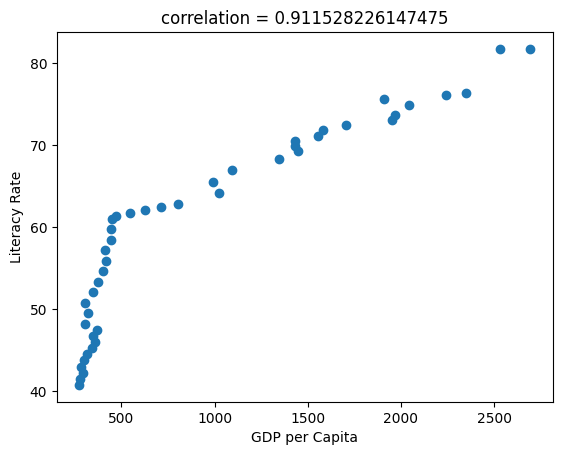

In [89]:
import matplotlib.pyplot as plt
plt.scatter(df['GDP per Capita'],df['literacy rate'])
plt.title(f"correlation = {cor}")
plt.xlabel("GDP per Capita")
plt.ylabel("Literacy Rate")
plt.show()

# To solve the chicken and egg probelm 
## In this case a question might arise what if literacy isn't the drive , what if rich countries that 
## already have the resources are easily able to improve the literacy rate?
## to find out what is the actual drive literacy or GDP per capita we will compare x year's literacy rate to
## (x+10) and (x+5) year's GDP per capita 
## applying Time-Lag Analysis

In [81]:
df["literacy rate lag10"] = df["literacy rate"].shift(10)
df["literacy rate lag5"] = df["literacy rate"].shift(5)
print(df[['GDP per Capita', 'literacy rate', 'literacy rate lag10','literacy rate lag5']].corr())
cor_with_5lag = df["GDP per Capita"].corr(df["literacy rate lag5"])
cor_with_10lag = df["GDP per Capita"].corr(df["literacy rate lag10"])
print("correlation with 10 years of gap=",cor_with_10lag)
print("correlation with 10 years of gap=",cor_with_5lag)

                     GDP per Capita  literacy rate  literacy rate lag10  \
GDP per Capita             1.000000       0.911528             0.970182   
literacy rate              0.911528       1.000000             0.987128   
literacy rate lag10        0.970182       0.987128             1.000000   
literacy rate lag5         0.930367       0.991064             0.990459   

                     literacy rate lag5  
GDP per Capita                 0.930367  
literacy rate                  0.991064  
literacy rate lag10            0.990459  
literacy rate lag5             1.000000  
correlation with 10 years of gap= 0.9701821991776601
correlation with 10 years of gap= 0.9303667682382312


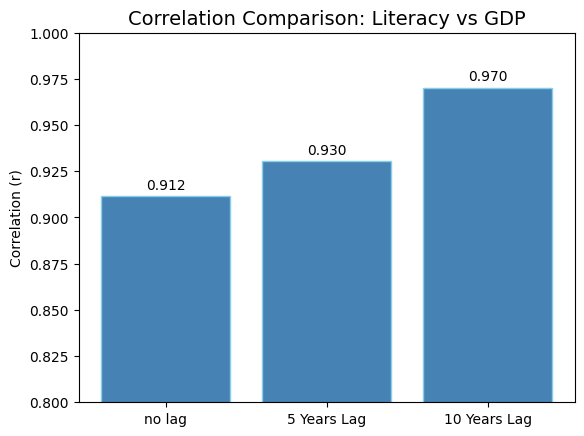

In [96]:
lags = {"no lag":cor,"5 Years Lag":cor_with_5lag,"10 Years Lag":cor_with_10lag}
bars = plt.bar(lags.keys(), lags.values(), color='steelblue',edgecolor='skyblue')
plt.bar_label(bars, padding=3, fmt='%.3f')
plt.ylim(0.8, 1.0)
plt.title('Correlation Comparison: Literacy vs GDP', fontsize=14)
plt.ylabel('Correlation (r)')
plt.show()

## This graph shows how correlation increases in positive direction as time increases which shows improvement in literacy rate 
## today effects the gdp per capita in future positively 